# 1. Problema de ordenamiento (QuickSort)

**Entrada**: Un conjunto de n números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, tal que $a_1'\leq a_2' \leq... \leq a_n'$.

El QuickSort es un algoritmo de ordenamiento que utiliza la metodología de divide y vencerás para ordenar un arreglo de menor a mayor. A pesar de tener un peor caso teórico de $O(n^2)$, todavía ve uso gracias a su complejidad promedio $O(nlog(n))$.





# 2. QuickSort y Partition

El siguiente código muestra una implementación del algoritmo **QuickSort** y las funciones de **Partition**.

## 2.1. Código

In [326]:
import random as rd
from termcolor import colored
import math as mt
import matplotlib.pyplot as plt
import copy
import datetime
from timeit import repeat
import statistics as st

In [327]:
def partitionDer(a, low, high, comps, verbose = False):
    # Con pivote al final
    piv = a[high] # Pivote al final
    i = low - 1
    if verbose:
        print("Pivote a la derecha")
        print("Arreglo:",(colored(f"{str(a[low:high+1])}","blue")))
    for j in range(low, high):
        if verbose:
          print("Pivote:", (colored(f"{str(piv)}","green")))
          print("Numero comparado con el pivote: ",(colored(f"{str(a[j])}","red")))
        comps += 1
        if a[j] <= piv: # Comparacion entre el pivote y numero actual
            if verbose:
              print("Numero menor al pivote, intercambiando...")
            i += 1
            a[i], a[j] = a[j], a[i] # Se intercambian los valores
        else: 
            if verbose:
              print("Numero mayor o igual al pivote, no hay cambio.")
    i += 1
    a[i], a[high] = a[high], a[i] # Se cambia el pivote con la posicion i
    return i, comps

In [328]:
def partitionIzq(a, low, high, comps, verbose = False):
  # Con pivote al comienzo
  piv = a[low]
  a[low], a[high] = a[high], a[low] # Pivote al comienzo
  i = low - 1
  if verbose:
      print("Pivote a la izquierda")
      print("Arreglo:",(colored(f"{str(a[low:high+1])}","blue")))
  for j in range(low, high):
      if verbose:
        print("Pivote:", (colored(f"{str(piv)}","green")),", Numero a comparar: ",(colored(f"{str(a[j])}","red")))
      comps += 1
      if a[j] <= piv: # Comparacion entre el pivote y numero actual
          if verbose:
            print("Numero menor al pivote, intercambiando...")
          i += 1
          a[i], a[j] = a[j], a[i] # Se intercambian los valores
      else: 
          if verbose:
            print("Numero mayor o igual al pivote, no hay cambio.")
  i += 1
  a[i], a[high] = a[high], a[i] # Se cambia el pivote con la posicion i
  return i, comps 

In [329]:
#Codigo Partition para cuando el pivote sea la mediana de tres numeros aleatorios.

def partitionMed(a, low, high, comps, verbose = False):
  # Pivote de mediana de tres
  b, c = [], []
  for j in range(0,3):
    b.append(rd.randint(low,high))
    c.append(a[b[j]])
  mediana = st.median(c)
  
  for j in (b):
    if mediana == a[j]:
      a[j], a[high] = a[high], a[j]

  piv = a[high]
  i = low - 1
  if verbose:
      print("Pivote de mediana de tres")
      print("Arreglo:",(colored(f"{str(a[low:high+1])}","blue")))

  for j in range (low, high):
    if verbose:
        print("Pivote:", (colored(f"{str(piv)}","green")),", Numero a comparar: ",(colored(f"{str(a[j])}","red")))
    comps += 1
    if a[j] <= piv:  #Numero con el que se compara el pivote.
      if verbose:
          print("Numero menor al pivote, intercambiando...")
      i += 1
      a[i], a[j] = a[j], a[i] #Debido a que el numero es menor al pivote de realiza un cambio de la posicion i con la j y se aumentan ambos indices.
    else: 
        if verbose:
          print("Numero mayor o igual al pivote, no hay cambio.")
  i += 1
  a[i], a[high] = a[high], a[i]  #Al terminar la busqueda el pivote se cambia por la posicion i + 1.
  return i, comps

In [330]:
def quickSort(a, low, high, posPiv, verbose = False, comps = 0):
    if low < high:
        match posPiv:
            case 1:
                piv, comps = partitionIzq(a, low, high, comps, verbose)
            case 2:
                piv, comps = partitionMed(a, low, high, comps, verbose)
            case default:
                piv, comps = partitionDer(a, low, high, comps, verbose)
        comps = quickSort(a, low, piv - 1, posPiv, verbose, comps)
        comps = quickSort(a, piv + 1, high, posPiv, verbose, comps)
    return comps

In [331]:
array = rd.sample(range(1,15), 10)
print("Arreglo original: ", array)
comps = quickSort(array, 0, len(array) - 1, rd.randrange(1,4))
print("Arreglo ordenado:", array)
print("Comparaciones:", comps)

Arreglo original:  [5, 14, 12, 13, 2, 8, 1, 7, 6, 4]
Arreglo ordenado: [1, 2, 4, 5, 6, 7, 8, 12, 13, 14]
Comparaciones: 19


## 2.2. Descripción del algoritmo

El algoritmo recibe como entrada un arreglo $a$ y retorna un arreglo ordenado de menor a mayor.

1. La funcion partition ordena el arreglo, ordenando los numeros menores al pivote a la izquierda y mayores que el de la derecha.

2. El previo proceso nos deja un arreglo que procedemos a partir por la mitad.

3. Llamamos a la funcion quickSort recursivamente para ordenar el arreglo.

## 2.3. Ejemplo

Por ejemplo, tenemos un arreglo:

$a=[6,8,2,1,9,6,5]$

Como recordatorio, si el numero es menor al pivote, sera cambiado por la posicion de $i$, si no, solo $j$ aumenta.

Para el ejemplo, utilizaremos como pivote la ultima posicion del arreglo, o sea, el numero $5$:

$a=[6,8,2,1,9,7,5]$

$i = a[-1], j = a[0]$

Como $6 < 5$ y $8 < 5$, no hay cambios y solo aumenta $j$.:

$a=[6,8,2,1,9,7,5]$

$i = a[-1], j = a[1]$

$2 < 5$, entonces cambiamos $a[i+1]$ con $a[j]$:

$a=[2,8,6,1,9,7,5]$

$i = a[0], j = a[2]$

$1 < 5$, entonces cambiamos de nuevo $a[i+1]$ con $a[j]$:

$a=[2,1,6,8,9,7,5]$

$i = a[1], j = a[3]$

$9 > 5$, entonces no hay cambio:

$a=[2,1,6,8,9,7,5]$

$i = a[1], j = a[4]$

$7 > 5$, entonces no hay cambio y como no hay mas comparaciones a hacer, el pivote es insertado en $a[i+1]$:

$a=[2,1,5,6,8,9,7]$

Con esto, tenemos los $x < piv$ a la izquierda y $x > piv$ a la derecha.

Utilizamos QuickSort recursivamente para ordenar los numeros de la izquierda y derecha. Asi ordenando el arreglo.

$a=[1,2,5,6,7,8,9]$

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [332]:
a = rd.sample(range(1, 100), 5)
comps = quickSort(a, 0, len(a) - 1, rd.randrange(1,4), True)
print("# Comparaciones: ", comps)

Pivote de mediana de tres
Arreglo: [21, 47, 76, 87, 5]
Pivote: 5 , Numero a comparar:  21
Numero mayor o igual al pivote, no hay cambio.
Pivote: 5 , Numero a comparar:  47
Numero mayor o igual al pivote, no hay cambio.
Pivote: 5 , Numero a comparar:  76
Numero mayor o igual al pivote, no hay cambio.
Pivote: 5 , Numero a comparar:  87
Numero mayor o igual al pivote, no hay cambio.
Pivote de mediana de tres
Arreglo: [21, 76, 87, 47]
Pivote: 47 , Numero a comparar:  21
Numero menor al pivote, intercambiando...
Pivote: 47 , Numero a comparar:  76
Numero mayor o igual al pivote, no hay cambio.
Pivote: 47 , Numero a comparar:  87
Numero mayor o igual al pivote, no hay cambio.
Pivote de mediana de tres
Arreglo: [87, 76]
Pivote: 76 , Numero a comparar:  87
Numero mayor o igual al pivote, no hay cambio.
# Comparaciones:  8


Elegimos al azar al inicio de la funcion cual pivote utilizar.

En cada iteración, los arreglos destacados en azul son los arreglos de entrada al partition, y destacamos el pivote actual en verde, y el numero siendo comparado a este en rojo.

# 3. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

*El **QuickSort** tiene un **tiempo de ejecución de** $O(n log (n))$ en el **mejor** caso y en el caso **promedio**, pero tiene un **peor** caso $O(n^2)$.*

### **Arbol de recurrencia**

Para calcular el tiempo de ejecución del QuickSort, debemos recordar que este se basa en la metodología divide y vencerás, entonces podemos plantearlo similarmente al MergeSort:

> Para el mejor caso:
>  $T(n) = \begin{cases}
  c  & n \text{ is small} \\
  2 T(n/2) + c \cdot n & \text{ otherwise}
\end{cases}$

> Para el caso promedio: 
>  $T(n) = \begin{cases} 
  c  & n \text{ is small} \\
  2 T(3n/4) + c \cdot n & \text{ otherwise}
  \end{cases}$

> Para el peor caso: 
>  $T(n) = \begin{cases}
  c & n \text{ is small} \\
  T(0) + T(n - 1) + c \cdot n & \text{ otherwise}
  \end{cases}$

Con estas funciones, podemos crear arboles de recurrencias.

## Mejor caso:

La funcion recibira el arreglo completo y luego sera dividido en 2 con las llamadas recursivas hasta conseguir el siguiente arbol:



![image](https://cdn.kastatic.org/ka-perseus-images/5fcbebf66560d8fc490de2a0d8a0e5b1d65c5c54.png)

Analizando el árbol, la suma de los tiempos de ejecución es: $cn log_2$, lo cual intrepretamos como $O(n log (n))$

## Caso promedio:

Se considera este caso ya que no siempre es fácil conseguir la mediana entre datos para llegar al mejor caso. Por esto, consideraremos el caso promedio como conseguir datos que dividan el arreglo en una razón 3:1

Con la función definida anteriormente para el caso promedio, podemos armar un árbol de la misma forma del caso anterior.

![image.png](https://i.imgur.com/dDYEOYG.png)

Aqui podemos apreciar que al sumar todas sus operaciones quedamos con la aproximación $cn \cdot log_\frac{4}{3}n$, o en otras palabras, $O(nlogn)$.

## Peor caso:

El peor caso ocurre cuando el pivote toma el mayor valor del arreglo para comenzar a ordenar. Para el ejemplo, consideraremos que el pivote esta al final de un arreglo ordenado.

Con la funcion previamente definida, nuestro árbol quedaría así:

![image.png](https://i.imgur.com/I8KpiBv.png)

Con lo que podemos ver en el árbol, la suma de las operaciones nos entrega:

$cn+c(n-1)+c(n-2)+...+2c = c(\sum\limits_{i=0}^{n}(n-i)-1)$

o simplificado:

$c(\frac{n(n+1)}{2}-1)$, que se interpreta como $O(n^2)$

### **Comprobación con código**
Ahora que sabemos como funciona el algoritmo, podemos comprobar si nuestro teorema esta correcto al ejecutar el código previamente escrito para el QuickSort en un rango de valores para que veamos que nuestro teorema esta correcto.

In [333]:
for n in range(1,15):
  a = rd.sample(range(1, 100), n)
  b = [i for i in range(1, n + 1)]
  comps1 = quickSort(a, 0, len(a) - 1, 1, False)
  comps2 = quickSort(b, 0, len(b) - 1, 1, False)

  print("Caso Promedio",n,":",a)
  print("Comparaciones/Divisiones =", comps1, ", n(log2(n)) =", (n * mt.log2(n)) // 1, "\n")
  print("Peor Caso",n,":",a)
  print("Comparaciones/Divisiones =", comps2, ", n(log2(n)) =", ((n * (n + 1)) // 2) - 1, "\n")


Caso Promedio 1 : [39]
Comparaciones/Divisiones = 0 , n(log2(n)) = 0.0 

Peor Caso 1 : [39]
Comparaciones/Divisiones = 0 , n(log2(n)) = 0 

Caso Promedio 2 : [11, 55]
Comparaciones/Divisiones = 1 , n(log2(n)) = 2.0 

Peor Caso 2 : [11, 55]
Comparaciones/Divisiones = 1 , n(log2(n)) = 2 

Caso Promedio 3 : [3, 66, 76]
Comparaciones/Divisiones = 2 , n(log2(n)) = 4.0 

Peor Caso 3 : [3, 66, 76]
Comparaciones/Divisiones = 3 , n(log2(n)) = 5 

Caso Promedio 4 : [3, 55, 89, 91]
Comparaciones/Divisiones = 5 , n(log2(n)) = 8.0 

Peor Caso 4 : [3, 55, 89, 91]
Comparaciones/Divisiones = 6 , n(log2(n)) = 9 

Caso Promedio 5 : [4, 29, 32, 56, 73]
Comparaciones/Divisiones = 6 , n(log2(n)) = 11.0 

Peor Caso 5 : [4, 29, 32, 56, 73]
Comparaciones/Divisiones = 10 , n(log2(n)) = 14 

Caso Promedio 6 : [11, 39, 54, 79, 80, 86]
Comparaciones/Divisiones = 9 , n(log2(n)) = 15.0 

Peor Caso 6 : [11, 39, 54, 79, 80, 86]
Comparaciones/Divisiones = 15 , n(log2(n)) = 20 

Caso Promedio 7 : [13, 42, 61, 81, 84, 8

# 4. Correctitud

### **Teorema (Correctitud)**

*El algoritmo **QuickSort** recibe un arreglo: $[a_1',a_2',...,a_n']$, y retorna los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir,* $a_1'\leq a_2' \leq... \leq a_n'$.

## Prueba del Teorema

Como el QuickSort es un arreglo recursivo, debemos utilizar inducción matemática.

##### **Caso base (n = 1)**

Cuando el arreglo es de longitud 1, el algoritmo termina automáticamente ya que el algoritmo chequea si $low < high$, como es de un elemento, ya esta ordenado.

##### **Caso inductivo (n > 1)**

Asumimos que el QuickSort es correcto para casos $m < n$. Cuando la funcion recibe un arreglo de tamaño $n > 1$ esta encuentra un pivote y procesa el arreglo de forma recursiva, de forma que reorganiza el arreglo desde el inicio hasta antes del pivote, y desde el pivote hasta el final.
Como el algoritmo ordena las secciones del arreglo a pesar de tener tamaño $m < n$, podemos asumir que el caso inductivo es verdadero.

##### **Correctitud**

Como los previos dos pasos son correctos, y sabiendo que la funcion "partition" reorganiza los arreglos que reciba, podemos concluir que el teorema de correctitud es correcto para nuestro algoritmo.

# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* Cantidad de comparaciones del peor caso calculadas matemáticamente
* Cantidad de comparaciones del mejor caso calculadas matemáticamente
* Cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para tamaños de problemas con $n \in [5,100]$.

Los arreglos de entrada son generados aleatoriamente haciendo un sampling de un conjunto de números entre 1 y 100, excepto para el peor caso, en el que será un arreglo ordenado desde 0 hasta $n-1$

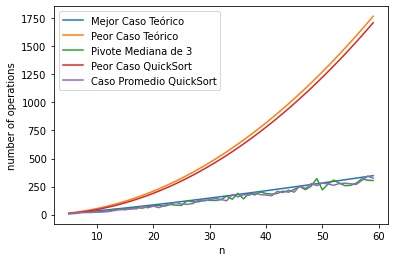

In [334]:
x = [n for n in range(5,60)] 
y1 = [n * mt.log2(n) for n in range(5,60)] # mejor caso
y2 = [(n*(n+1)/2)-1 for n in range(5,60)] # peor caso
y3 = [] # pivote media de 3 numeros
y4 = [] # peor caso
y5 = [] # caso promedio

for n in range(5,60):
  a = rd.sample(range(1, 100), n) # caso aleatorio
  b = a.copy() # caso con pivote especial
  c = [i for i in range(0,n)] # peor caso
  cont = quickSort(b, 0, len(b) - 1, 3, False)
  y3.append(cont)
  cont2 = quickSort(c, 0, len(c) - 1, 1, False)
  y4.append(cont2)
  cont3 = quickSort(a, 0, len(a) - 1, 1, False)
  y5.append(cont3)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x,y5)
plt.legend(["Mejor Caso Teórico", "Peor Caso Teórico", "Pivote Mediana de 3", "Peor Caso QuickSort", "Caso Promedio QuickSort"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

### Análisis de resultados

En el gráfico, podemos ver que el mejor caso teórico y el caso calculado con la media de 3 elementos aleatorios son aproximadamente iguales. Entonces podemos concluir que el caso promedio si tiene una complejidad $O(nlogn)$

En el peor caso, podemos apreciar que es igual al peor caso teórico que habiamos planteado, entonces tambien confirmar el peor caso de $O(n^2)$

## 5.2. Número de comparaciones (Merge vs Quick)

En el siguiente gráfico se grafican las comparaciones del algoritmo **QuickSort** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños $n \in [5,100]$, y se compara al mismo tiempo del algoritmo **MergeSort**.

# Codigo MergeSort


In [335]:
def Merge(izq, der, verbose, comps, sorts):
  b = []
  if verbose:
    print("\nInicio Merge...")
    print("Arreglo Izquierdo: ",colored(f"{str(izq)}","red"))
    print("Arreglo Derecho: ",colored(f"{str(der)}","blue"),"\n")
  while True: 
    if len(izq) > 0 and len(der) > 0: # Mientras cualquiera de los arreglos tenga un largo mayor a 0 se mantendra el ciclo infinito.
      if izq[0] < der[0]: # Si el numero de la derecha es mayor que el de la izquierda se ingresa en el nuevo arreglo y se borra del arreglo original.
        comps += 1
        b.append(izq[0])
        izq.pop(0)
      else: # Viceversa
        comps += 1
        b.append(der[0])
        der.pop(0) 
    else:
      break
      
  if len(izq) > 0 :# Como el ciclo cierra al terminar solo uno de los arreglos, lo que sobra del otro arreglo se inserta aqui
    while len(izq) > 0:
      comps += 1
      b.append(izq[0])
      izq.pop(0)
  else:
    while len(der) > 0:
      comps += 1
      b.append(der[0])
      der.pop(0)
      
  if verbose:
    print("Arreglos Combinados:")
    print(b, "\n")
  return b, comps, sorts



def MergeSort(a, comps, sorts, verbose = False):
  if(len(a) == 1): return a, comps, sorts # Si el arreglo recibido es de largo 1, se retorna de inmediato ya que no se puede dividir mas
  mitad = len(a)//2
  izq = a[0:mitad] # Se divide el arreglo en dos arreglos separados
  der = a[mitad:]
  sorts += 1
  if (verbose):
    print("Arreglo Actual:")
    print(colored(f"{str(a)}","green"))
    print("Arreglo Separado:")
    print(colored(f"{str(izq)}","red"),",",colored(f"{str(der)}","blue"))

  izq, comps, sorts = MergeSort(izq, comps, sorts, verbose) # Se llama recursivamente a MergeSort para subdividir el arreglo si es posible
  der, comps, sorts = MergeSort(der, comps, sorts, verbose)

  return Merge(izq, der, verbose, comps, sorts) # Una vez tenemos los arreglos listos, se inicia la funcion merge.


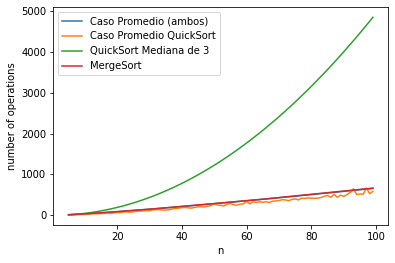

In [336]:
x = [n for n in range(5,100)]
y = [n * mt.log2(n) for n in range(5,100)] # Caso promedio entre ambos algoritmos
y1 = [] # Comparaciones para QuickSort (Promedio)
y2 = [] # Comparaciones para QuickSort (Pivote Especial)
y3 = [] # Comparaciones para MergeSort

for n in range(5,100):
  a = rd.sample(range(1, 100), n) # Caso aleatorio
  b = a.copy()
  c = a.copy()
  cont = quickSort(b, 0, len(b) - 1, 2, False)
  y1.append(cont)
  cont2 = quickSort(b, 0, len(b) - 1, 3, False)
  y2.append(cont2)
  c, comps, sorts = MergeSort(c, 0, 0)
  y3.append(comps)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["Caso Promedio (ambos)", "Caso Promedio QuickSort", "QuickSort Mediana de 3", "MergeSort"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

### Análisis de resultados

Podemos ver en el gráfico que al aumentar el largo del arreglo, el QuickSort con pivote al extremo del arreglo se vuelve más inestable, mientras que el MergeSort y el QuickSort con pivote de mediana de 3 son mucho mas estables.

## 5.2. Tiempo de ejecución (experimental)

En el siguiente gráfico se reporta el tiempo de ejecución del algoritmo **QuickSort** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños $n \in [5,500]$, y se compara al mismo tiempo del algoritmo **MergeSort**.


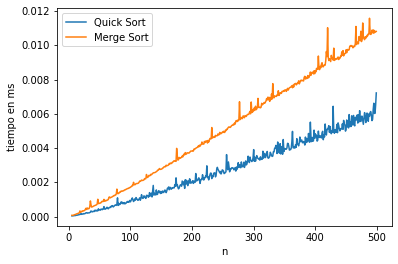

In [337]:
x, y, y2 = [], [], []

for n in range(5,500):

  a = rd.sample(range(1, 1000), n)
  b = a.copy()

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a}, {0}, {len(a) - 1}, {1})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a}, {0}, {0})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y2.append(t2)

plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["Quick Sort", "Merge Sort"])

plt.xlabel('n')
plt.ylabel('tiempo en ms')
plt.show()

### Análisis de resultados

Podemos ver en el gráfico que, como era de esperar, el QuickSort es más rápido y al parecer más estable que el MergeSort.

Recordamos que los peaks de tiempo pueden ser debido al comportamiento errático de los procesadores o bajo cuanto uso está.